## 데이터 분석의 EDA와 kmeans를 경험해보기 (가능하면 p-value까지)
- 말씀하신 외국 블로그 내용
- 빅데이터 분석기사를 취득하면서 배웠던 p-value 등을 실제적으로 코드로 경험한 적이 없어 직접 경험해보고자 좋은 가이드를 바탕으로 진행
- 데이터가 블로그랑 달라 p-value는 진행될지 불확실

In [305]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [306]:
df=pd.read_csv('train.csv') ## 판다스로 데이터 불러오기 

C:\Users\USER\AppData\Local\Temp\ipykernel_10884\3244144143.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv') ## 판다스로 데이터 불러오기


In [307]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


### json 파일 부분(device, geoNetwork,totals,trafficSource)에 대해 normalize 진행

In [308]:
import json # JSON 인코딩 과 디코딩 
from pandas import json_normalize #반정형 JSON 데이터를 평평한 테이블로 정규화하는 함수

def load_df(csv_path='train.csv'):
    json_columns=['device','geoNetwork','totals','trafficSource']
    # converters라는 파라미터= 특정 컬럼의 값들을 변환시키는 함수를 적용하는 파라미터          fullvisitorID str로 설정
    df=pd.read_csv(csv_path,converters={column:json.loads for column in json_columns}, dtype={'fullVisitorID':'str'}) 
    for column in json_columns: # flatten 할 컬럼들 읽어오고 
        column_normal=json_normalize(df[column]) # 정규화 시킨후
        column_normal.columns=[f"{column}_{subcolumn}" for subcolumn in column_normal.columns] # 컬럼명 재설정
        df=df.drop(column,axis=1).merge(column_normal,right_index=True,left_index=True) # 기존 컬럼 삭제후 재설정한 컬럼정리
    return df 

df=load_df()

C:\Users\USER\AppData\Local\Temp\ipykernel_10884\137502972.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(csv_path,converters={column:json.loads for column in json_columns}, dtype={'fullVisitorID':'str'})


In [309]:
df.head() #정리된걸 볼 수 있다.

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA (탐색적 데이터 분석)

In [310]:
df.shape

(903653, 55)

In [311]:
df.isna().sum() #결측치 확인

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device_browser                                            0
device_browserVersion                                     0
device_browserSize                                        0
device_operatingSystem                                    0
device_operatingSystemVersion                             0
device_isMobile                                           0
device_mobileDeviceBranding                               0
device_mobileDeviceModel                                  0
device_mobileInputSelector              

In [312]:
df = df.loc[:,['channelGrouping', 'date', 'fullVisitorId', 'sessionId',    # 쓸거 챙기기
              'visitId', 'visitNumber', 'device_browser', 'device_operatingSystem', 
              'device_isMobile', 'geoNetwork_country', 'trafficSource_source', 
              'totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces',
              'totals_transactionRevenue']]
df

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,False,Turkey,google,1,1,1,1,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,False,Australia,google,1,1,1,1,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,False,Spain,google,1,1,1,1,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,False,Indonesia,google,1,1,1,1,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,True,United Kingdom,google,1,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,20170104,5123779100307500332,5123779100307500332_1483554750,1483554750,1,Chrome,Windows,False,Puerto Rico,youtube.com,1,17,15,NaN,NaN
903649,Social,20170104,7231728964973959842,7231728964973959842_1483543798,1483543798,1,Chrome,Android,True,Sri Lanka,youtube.com,1,18,13,NaN,NaN
903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,1483526434,1,Android Webview,Android,True,South Korea,youtube.com,1,24,21,NaN,NaN
903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,1483592857,1,Chrome,Windows,False,Indonesia,facebook.com,1,24,22,NaN,NaN


In [313]:
df.fillna(value=0,inplace=True) # 결측치 0으로 채우기
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,False,Turkey,google,1,1,1,1,0
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,False,Australia,google,1,1,1,1,0
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,False,Spain,google,1,1,1,1,0
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,False,Indonesia,google,1,1,1,1,0
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,True,United Kingdom,google,1,1,1,1,0


In [314]:
df.isna().sum() # 결측치 없음 확인 완료 

channelGrouping              0
date                         0
fullVisitorId                0
sessionId                    0
visitId                      0
visitNumber                  0
device_browser               0
device_operatingSystem       0
device_isMobile              0
geoNetwork_country           0
trafficSource_source         0
totals_visits                0
totals_hits                  0
totals_pageviews             0
totals_bounces               0
totals_transactionRevenue    0
dtype: int64

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   channelGrouping            903653 non-null  object
 1   date                       903653 non-null  int64 
 2   fullVisitorId              903653 non-null  object
 3   sessionId                  903653 non-null  object
 4   visitId                    903653 non-null  int64 
 5   visitNumber                903653 non-null  int64 
 6   device_browser             903653 non-null  object
 7   device_operatingSystem     903653 non-null  object
 8   device_isMobile            903653 non-null  bool  
 9   geoNetwork_country         903653 non-null  object
 10  trafficSource_source       903653 non-null  object
 11  totals_visits              903653 non-null  object
 12  totals_hits                903653 non-null  object
 13  totals_pageviews           903653 non-null  

In [316]:
for i in df.columns:
    if df[i].dtype == object:  # 
        df[i] = df[i].astype(str) # 'object'인 경우 str(문자열로) 변환 

In [317]:
df.channelGrouping.unique() # 채널그룹핑의 고유값들 확인 

array(['Organic Search', 'Referral', 'Paid Search', 'Affiliates',
       'Direct', 'Display', 'Social', '(Other)'], dtype=object)

In [318]:

df.channelGrouping = df.channelGrouping.replace("(Other)", "Others") #(Other)글자 Others로 바꿔주기 

In [319]:
df.device_isMobile.unique() # 마찬가지로 isMobile 고유값 확인 
df.device_isMobile = df.device_isMobile.astype(str) # str형태로 타입변경 
df.loc[df.device_isMobile == "False", "device"] = "Desktop" # isMobile이 False인 경우 device를 desktop으로 설정 
df.loc[df.device_isMobile == "True", "device"] = "Mobile" # 반대로 True이면 Mobile로 설정(device를)

In [320]:
df.geoNetwork_country.unique() # geoNetwork_country 고유값 확인 
df.geoNetwork_country = df.geoNetwork_country.replace("(not set)", "Others") # not set 을 Others로 변경 

In [321]:
pd.set_option('mode.chained_assignment', None) # error,warning 무시 (경고를 끄는거)

df['traffic_source'] = df.trafficSource_source  #['traffic_source'] 열에 값 복사 

main_traffic_source = ["google","baidu","bing","yahoo","facebook","youtube","duckduckgo","quora", # 해당 traffic source
                      "reddit","linkedin","messenger","pinterest","yandex","twitter"]

df.traffic_source[df.traffic_source.str.contains("google")] = "google" #각 traffic 들이 포함되어있으면 그걸로 변경 
df.traffic_source[df.traffic_source.str.contains("baidu")] = "baidu"
df.traffic_source[df.traffic_source.str.contains("bing")] = "bing"
df.traffic_source[df.traffic_source.str.contains("yahoo")] = "yahoo"
df.traffic_source[df.traffic_source.str.contains("facebook")] = "facebook"
df.traffic_source[df.traffic_source.str.contains("youtube")] = "youtube"
df.traffic_source[df.traffic_source.str.contains("duckduckgo")] = "duckduckgo"
df.traffic_source[df.traffic_source.str.contains("quora")] = "quora"
df.traffic_source[df.traffic_source.str.contains("reddit")] = "reddit"
df.traffic_source[df.traffic_source.str.contains("linkedin")] = "linkedin"
df.traffic_source[df.traffic_source.str.contains("lnkd")] = "linkedin"
df.traffic_source[df.traffic_source.str.contains("messenger")] = "messenger"
df.traffic_source[df.traffic_source.str.contains("pinterest")] = "pinterest"
df.traffic_source[df.traffic_source.str.contains("yandex")] = "yandex"
df.traffic_source[df.traffic_source.str.contains("twitter")] = "twitter"
df.traffic_source[~df.traffic_source.isin(main_traffic_source)] = "Others" # 아니라면 Others로 지정 

In [322]:
df['deviceBrowser'] = df.device_browser #디바이스 브라우저 복사

main_device_browser = ["Chrome","Safari","Firefox","Internet Explorer","Edge", # 브라우저 명 세팅
                      "Opera","UC Browser","YaBrowser","Coc Coc"]

df.deviceBrowser[df.deviceBrowser.str.contains("Chrome")] = "Chrome" # 해당 브라우저 있으면 해당브라우저로 이름 변경
df.deviceBrowser[df.deviceBrowser.str.contains("Safari")] = "Safari"
df.deviceBrowser[df.deviceBrowser.str.contains("Firefox")] = "Firefox"
df.deviceBrowser[df.deviceBrowser.str.contains("Internet Explorer")] = "Internet Explorer"
df.deviceBrowser[df.deviceBrowser.str.contains("Edge")] = "Edge"
df.deviceBrowser[df.deviceBrowser.str.contains("Opera")] = "Opera"
df.deviceBrowser[df.deviceBrowser.str.contains("UC Browser")] = "UC Browser"
df.deviceBrowser[df.deviceBrowser.str.contains("YaBrowser")] = "YaBrowser"
df.deviceBrowser[df.deviceBrowser.str.contains("Coc Coc")] = "Coc Coc"
df.deviceBrowser[~df.deviceBrowser.isin(main_device_browser)] = "Others" #업으면 Others로 설정 

In [323]:
df.device_operatingSystem.unique() #마찬가지로 operatingSystem 고유값 확인 
df.device_operatingSystem = df.device_operatingSystem.replace("(not set)", "Others") # not set이라 되어있는거 Others로 변경

In [324]:
df.drop(columns=["device_isMobile"], inplace=True) #isMobile 컬럼은 날리기 

In [325]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,device,traffic_source,deviceBrowser
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,Turkey,google,1,1,1,1,0,Desktop,google,Chrome
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,Australia,google,1,1,1,1,0,Desktop,google,Firefox
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,Spain,google,1,1,1,1,0,Desktop,google,Chrome
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,Indonesia,google,1,1,1,1,0,Desktop,google,UC Browser
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,United Kingdom,google,1,1,1,1,0,Mobile,google,Chrome


In [326]:
display(df.columns) #컬럼명 확인 
display(df.info())

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'device_browser', 'device_operatingSystem',
       'geoNetwork_country', 'trafficSource_source', 'totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces',
       'totals_transactionRevenue', 'device', 'traffic_source',
       'deviceBrowser'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   channelGrouping            903653 non-null  object
 1   date                       903653 non-null  int64 
 2   fullVisitorId              903653 non-null  object
 3   sessionId                  903653 non-null  object
 4   visitId                    903653 non-null  int64 
 5   visitNumber                903653 non-null  int64 
 6   device_browser             903653 non-null  object
 7   device_operatingSystem     903653 non-null  object
 8   geoNetwork_country         903653 non-null  object
 9   trafficSource_source       903653 non-null  object
 10  totals_visits              903653 non-null  object
 11  totals_hits                903653 non-null  object
 12  totals_pageviews           903653 non-null  object
 13  totals_bounces             903653 non-null  

None

In [327]:
columns_to_numeric=['totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces','totals_transactionRevenue'] #숫자형으로 바꿀 컬럼들

for i in columns_to_numeric:
    df[i] = pd.to_numeric(df[i])  # 숫자형으로 바꾸기 

In [328]:
# 그룹화 하고 그룹에 대해 집계함수 적용후 인덱스 초기화
df_groupby = df.groupby(['fullVisitorId', 'channelGrouping', 'geoNetwork_country', 'traffic_source', 
                         'device', 'deviceBrowser', 'device_operatingSystem']).agg({
                        'totals_hits':'sum', 'totals_pageviews':'sum', 'totals_bounces':'sum',
                        'totals_transactionRevenue':'sum'}).reset_index()

In [329]:
df_groupby = df_groupby.sort_values(by='totals_transactionRevenue', ascending=False).reset_index(drop=True) # 순차 정렬하고 인덱스초기화
df_groupby.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,1957458976293878100,Display,United States,Others,Desktop,Firefox,Windows,2378,1998,4,59257930000
1,1957458976293878100,Direct,United States,Others,Desktop,Firefox,Windows,1370,1134,3,17855500000
2,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,16023750000
3,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,15170120000
4,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,11211100000


In [330]:
df_groupby.totals_transactionRevenue = df_groupby.totals_transactionRevenue.apply(lambda x: round(x/100000,-1)) #10만으로 나누고 소수점을 기준으로 왼쪽으로 한자리 이동후 반올림
#

In [331]:
df_groupby.describe()

,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
count,740917.000000,740917.000000,740917.000000,740917.000000
mean,5.606127,4.694812,0.608206,20.787227
std,16.399311,12.439451,0.845341,911.597635
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000
75%,4.000000,4.000000,1.000000,0.000000
max,2912.000000,2318.000000,123.000000,592580.000000


<Axes: ylabel='totals_transactionRevenue'>

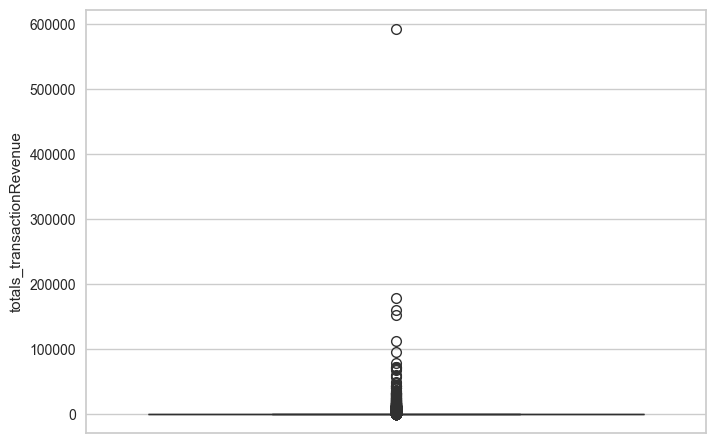

In [332]:
sns.boxplot(df_groupby.totals_transactionRevenue)

<Axes: ylabel='totals_hits'>

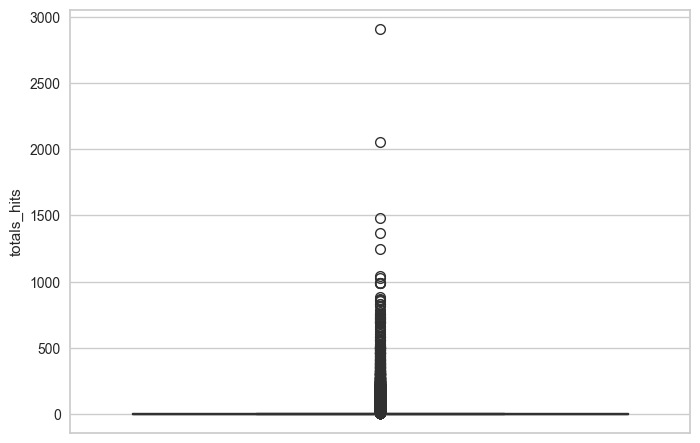

In [333]:
df_groupby = df_groupby.loc[df_groupby.totals_transactionRevenue < 200000]
sns.boxplot(df_groupby.totals_hits)

<Axes: ylabel='totals_pageviews'>

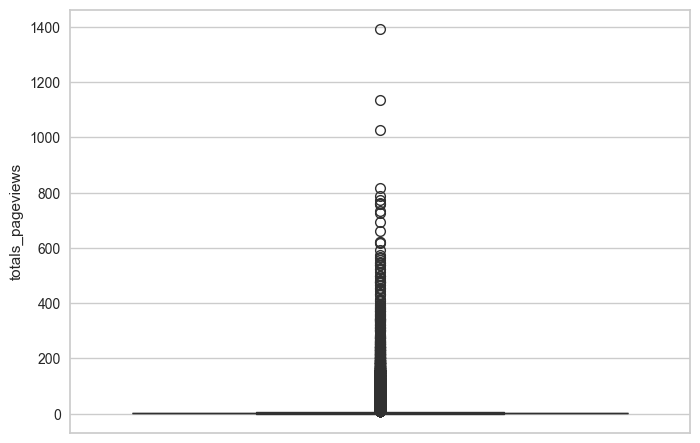

In [334]:
df_groupby = df_groupby.loc[df_groupby.totals_hits < 1600]
sns.boxplot(df_groupby.totals_pageviews)

In [335]:
df_groupby = df_groupby.loc[df_groupby.totals_pageviews < 1000]
df_groupby.shape

(740911, 11)

In [336]:
 from sklearn.cluster import KMeans #KMeans 클러스팅 모델을 불러오고 

data = df_groupby.iloc[:, 7:] #사용할 열을 선택

kmeans = KMeans(n_clusters=3, init="k-means++")# n_cluster= 클러스터의 개수 ,
kmeans.fit(data) # 적용

labels = kmeans.predict(data) #데이터 포인트에 할당된 클러스터 레이블을 가져옴 
labels = pd.DataFrame(data=labels, index = df_groupby.index, columns=["labels"]) # 데이터프레임화시키기


c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [337]:
df_kmeans = pd.concat([df_groupby, labels], axis=1) # 클러스터링 결과인 labels를 기존 데이터프레임에 추가
df_kmeans = df_kmeans.reset_index(drop=True) # 인덱스 재설정
df_kmeans.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
0,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,160240.0,2
1,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,151700.0,2
2,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,112110.0,2
3,4984366501121503466,Direct,United States,Others,Desktop,Chrome,Chrome OS,724,540,4,95140.0,2
4,9029794295932939024,Referral,United States,google,Desktop,Chrome,Windows,782,566,3,78460.0,2


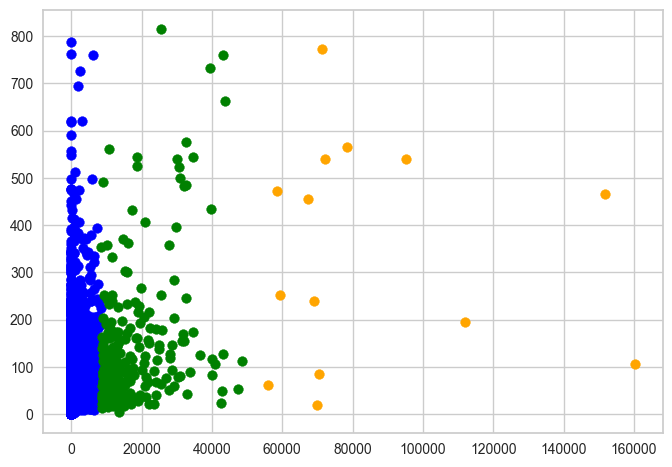

In [338]:
plt.scatter(df_kmeans.totals_transactionRevenue[df_kmeans.labels == 0], # 클러스터 레이블 0- 파랑 1-초록,2-주황으로 표시
            
            df_kmeans.totals_pageviews[df_kmeans.labels == 0], c='blue')

plt.scatter(df_kmeans.totals_transactionRevenue[df_kmeans.labels == 1],
            df_kmeans.totals_pageviews[df_kmeans.labels == 1], c='green')

plt.scatter(df_kmeans.totals_transactionRevenue[df_kmeans.labels == 2],
            df_kmeans.totals_pageviews[df_kmeans.labels == 2], c='orange')

plt.show()

c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

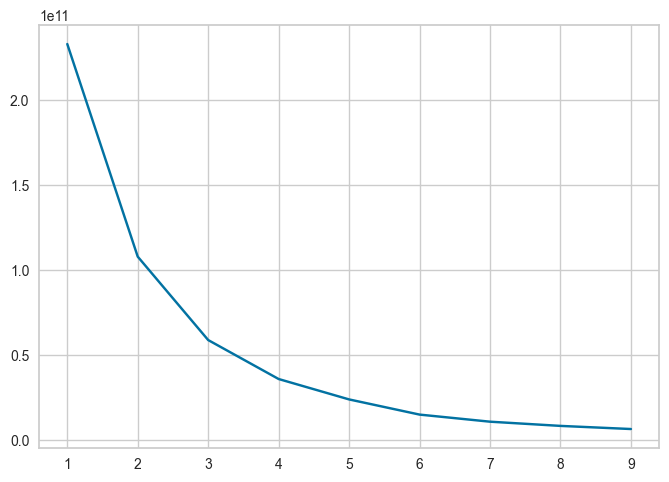

In [339]:
#클러스터의 최적의 갯수를 찾기위해서 

num_clusters = [x for x in range(1,10)] # 1에서 9까지 시도할 클러스터 개수 리스트 생성
inertia = [] # 이니셔는 각클러스터의 중심과의 거리의 제곱합(클러스터의 성능을 나타내는 지표)

for i in num_clusters: # 각 클러스터 개수에 대해 모델을 훈련하고 이니셔를 저장
    model = KMeans(n_clusters = i, init="k-means++")
    model.fit(data)
    inertia.append(model.inertia_)
    
plt.plot(num_clusters, inertia)# 클러스터에 개수에 대해 이니셔 시각화
plt.show()

#### 객관적인 k 결정 방법인 Elbow Method (k를 결정하기 쉽게 도와주는 함수인 yellowbrick의 KElbowVisualizer를 불러와서 진행)
그래프에서 파란색이 각 데이터들의 군집 중심과의 평균 거리이고
초록색은 학습 시간을 나타냅니다.
검정색 점선의 위치가 추천값으로 본 블로그에서는 4로 진행하였지만 저는 이 추천값을 이용해보도록 하겠습니다.

In [340]:
# !pip install yellowbrick

c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

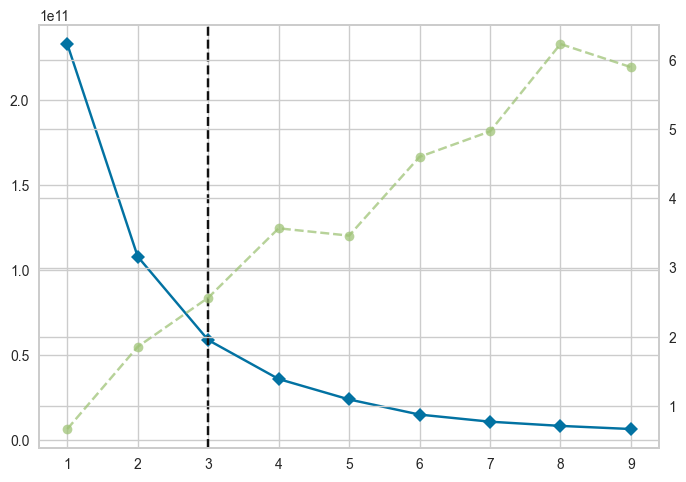

In [341]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10))
visualizer.fit(data)

In [342]:
kmeans = KMeans(n_clusters=3, init="k-means++") 
kmeans.fit(data)

labels_n3 = kmeans.predict(data)
labels_n3= pd.DataFrame(data=labels_n3, index = df_groupby.index, columns=["labels"])   # label 지정해주고 데이터프레임화

df_kmeans_n3= pd.concat([df_groupby, labels_n3], axis=1) # label 붙여주기 
df_kmeans_n3 = df_kmeans_n3.reset_index(drop=True)
df_kmeans_n3.head()

c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
0,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,160240.0,1
1,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,151700.0,1
2,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,112110.0,1
3,4984366501121503466,Direct,United States,Others,Desktop,Chrome,Chrome OS,724,540,4,95140.0,1
4,9029794295932939024,Referral,United States,google,Desktop,Chrome,Windows,782,566,3,78460.0,1


In [343]:
df_kmeans_n3['labels'].value_counts()

labels
0    740648
2       249
1        14
Name: count, dtype: int64

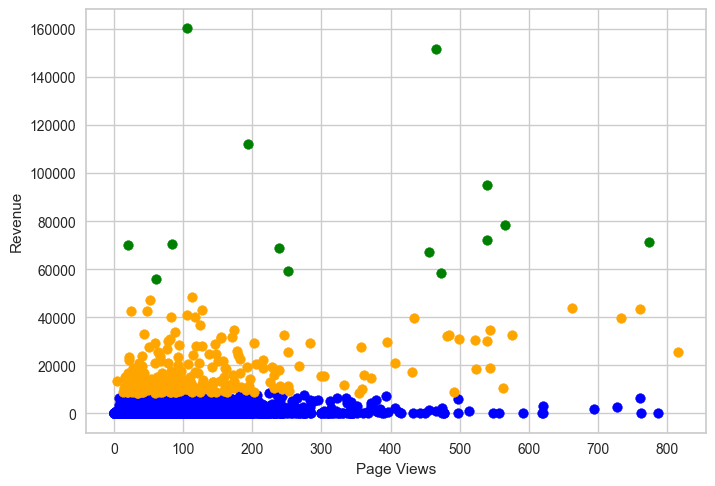

In [344]:
plt.scatter(df_kmeans_n3.totals_pageviews[df_kmeans_n3.labels == 0], #군집화 처리 된 label 마다 색 지정후 그리기
            df_kmeans_n3.totals_transactionRevenue[df_kmeans_n3.labels == 0], c='blue')

plt.scatter(df_kmeans_n3.totals_pageviews[df_kmeans_n3.labels == 1],#군집화 처리 된 label 마다 색 지정후 그리기
            df_kmeans_n3.totals_transactionRevenue[df_kmeans_n3.labels == 1], c='green')

plt.scatter(df_kmeans_n3.totals_pageviews[df_kmeans_n3.labels == 2],#군집화 처리 된 label 마다 색 지정후 그리기
            df_kmeans_n3.totals_transactionRevenue[df_kmeans_n3.labels == 2], c='orange')

plt.xlabel("Page Views")
plt.ylabel("Revenue")

plt.show()


In [345]:
df_group0 = df_kmeans_n3.loc[df_kmeans_n3.labels == 0]  # 0으로 분류된 그룹 정리
df_group1 = df_kmeans_n3.loc[df_kmeans_n3.labels == 1]  # 1로 분류된 그룹 정리
df_group2 = df_kmeans_n3.loc[df_kmeans_n3.labels == 2]  # 2로 분류된 그룹 정리

In [346]:
df_group0.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
263,7046459416249489564,Direct,United States,Others,Desktop,Chrome,Macintosh,54,35,0,8550.0,0
264,4154041461958944095,Direct,United States,Others,Desktop,Chrome,Macintosh,43,29,0,8540.0,0
265,5592881072764401031,Organic Search,Canada,google,Desktop,Chrome,Windows,117,97,0,8510.0,0
266,8643842096517952124,Organic Search,United States,google,Desktop,Chrome,Windows,171,124,1,8490.0,0
267,216182135691067032,Organic Search,United States,google,Desktop,Chrome,Macintosh,328,224,0,8450.0,0


Text(0.5, 1.0, 'Device Browser')

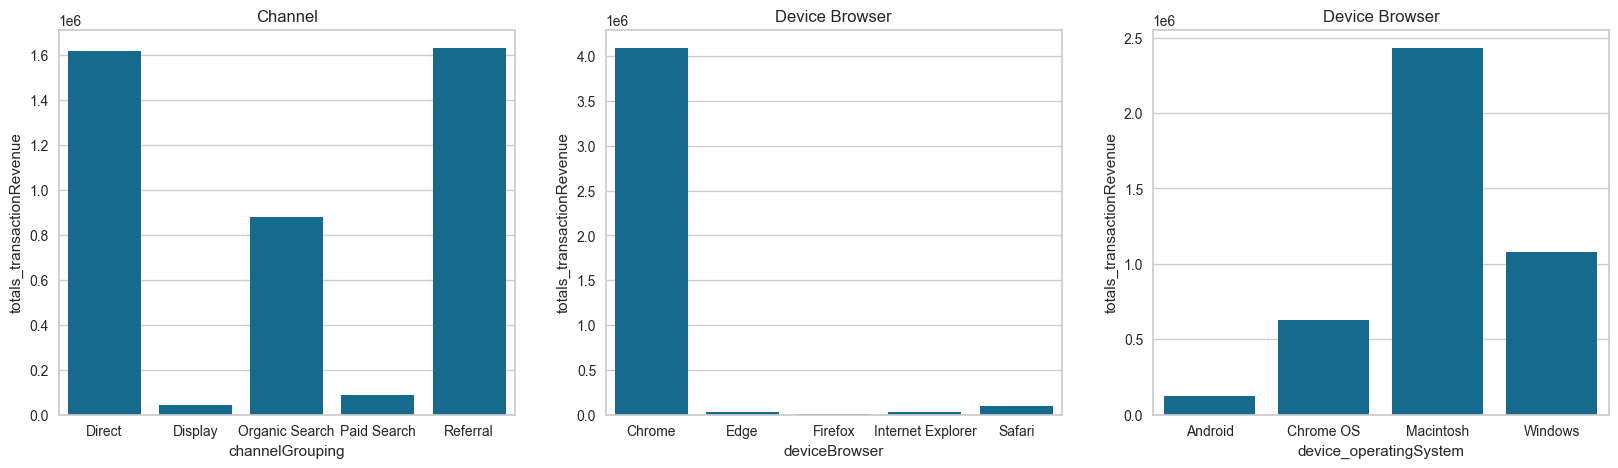

In [347]:
#2그룹 확인

df_group2_channel = df_group2.groupby('channelGrouping').totals_transactionRevenue.sum().reset_index() # 합계와 인덱스 초기화
df_group2_browser = df_group2.groupby('deviceBrowser').totals_transactionRevenue.sum().reset_index()
df_group2_os = df_group2.groupby('device_operatingSystem').totals_transactionRevenue.sum().reset_index()

fig, axes = plt.subplots(1,3,figsize=(20,5))

# 채널, 디바이스 브라우저, 운영 체제에 따른 totals_transactionRevenue의 합계를 계산하고 시각화하는 부분
sns.barplot(ax=axes[0], x=df_group2_channel.channelGrouping, y=df_group2_channel.totals_transactionRevenue)
axes[0].set_title("Channel") # 

sns.barplot(ax=axes[1], x=df_group2_browser.deviceBrowser, y=df_group2_browser.totals_transactionRevenue)
axes[1].set_title("Device Browser")

sns.barplot(ax=axes[2], x=df_group2_os.device_operatingSystem, y=df_group2_os.totals_transactionRevenue)
axes[2].set_title("Device Browser")

In [348]:
from scipy.stats import f_oneway
#  channelGrouping에 따른 totals_transactionRevenue 의 평균값이 통계적으로 유의미한가 ANOVA 사용 
# ANOVA를 위해 채널 그룹에 따른 transactionRevenue 데이터 추출
channels = df_group2['channelGrouping'].unique()
data_by_channel = [df_group2[df_group2['channelGrouping'] == channel]['totals_transactionRevenue'] for channel in channels]

# ANOVA 수행
anova_result = f_oneway(*data_by_channel)

# ANOVA 결과 출력
print("ANOVA Result:")
print(anova_result)

# P-value가 0.05보다 작으면 유의미한 차이가 있다고 판단할 수 있음
if anova_result.pvalue < 0.05:
    print("통계적으로 의미있는 차이가 그룹들 간에 존재한다.")
else:
    print("통계적으로 의미있는 차이가 그룹들 간에 없다")


ANOVA Result:
F_onewayResult(statistic=1.774617837469758, pvalue=0.13453493044271045)
통계적으로 의미있는 차이가 그룹들 간에 없다


In [349]:
from scipy.stats import f_oneway
#  channelGrouping에 따른 totals_transactionRevenue 의 평균값이 통계적으로 유의미한가 ANOVA 사용 
# ANOVA를 위해 채널 그룹에 따른 transactionRevenue 데이터 추출
channels = df_group0['channelGrouping'].unique()
data_by_channel = [df_group0[df_group0['channelGrouping'] == channel]['totals_transactionRevenue'] for channel in channels]

# ANOVA 수행
anova_result = f_oneway(*data_by_channel)

# ANOVA 결과 출력
print("ANOVA Result:")
print(anova_result)

# P-value가 0.05보다 작으면 유의미한 차이가 있다고 판단할 수 있음
if anova_result.pvalue < 0.05:
    print("통계적으로 의미있는 차이가 그룹들 간에 존재한다.")
else:
    print("통계적으로 의미있는 차이가 그룹들 간에 없다")


ANOVA Result:
F_onewayResult(statistic=1135.2093639710479, pvalue=0.0)
통계적으로 의미있는 차이가 그룹들 간에 존재한다.
